
importing library


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data training preprocessing

In [2]:
training_set =tf.keras.utils.image_dataset_from_directory(
    'E:/DataSet/train',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 45637 files belonging to 2 classes.


In [3]:
validation_set =tf.keras.utils.image_dataset_from_directory(
    'E:/DataSet/val',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 6192 files belonging to 2 classes.


validation image preprocesssing


In [4]:
training_set


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [5]:
#for x,y in training_set:
    #print(x,x.shape)
    #print(y,y.shape)
#break

building model

In [6]:
from tensorflow.keras.layers import Dense,Conv2D
from tensorflow.keras.models import Sequential
from keras.layers import MaxPool2D,Flatten
from tensorflow.keras.layers import Dropout


In [7]:
model = Sequential()

building convolution layer

In [8]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

E:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:

model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Dropout(0.25))

In [14]:
model.add(Flatten())

model.add(Dense(units=1024,activation='relu'))

In [15]:
model.add(Dense(units=1500,activation='relu'))

In [16]:
model.add(Dropout(0.4))

In [17]:
#output layer
model.add(Dense(units=38,activation='softmax'))

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)


training model


In [20]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 1387s 968ms/step - accuracy: 0.8976 - loss: 0.2866 - val_accuracy: 0.9842 - val_loss: 0.0436
Epoch 2/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 1343s 941ms/step - accuracy: 0.9867 - loss: 0.0370 - val_accuracy: 0.9914 - val_loss: 0.0239
Epoch 3/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 1669s 1s/step - accuracy: 0.9941 - loss: 0.0199 - val_accuracy: 0.9843 - val_loss: 0.0506
Epoch 4/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 5207s 4s/step - accuracy: 0.9939 - loss: 0.0179 - val_accuracy: 0.9969 - val_loss: 0.0102
Epoch 5/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 1285s 900ms/step - accuracy: 0.9955 - loss: 0.0130 - val_accuracy: 0.9890 - val_loss: 0.0305
Epoch 6/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 1338s 938ms/step - accuracy: 0.9955 - loss: 0.0123 - val_accuracy: 0.9834 - val_loss: 0.0754
Epoch 7/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 1378s 966ms/step - accuracy: 0.9932 - loss: 0.0216 - val_accuracy: 0.9966 - val_loss: 0.0101
Epoch 8/10
1427/1427 ━━━━━━━━━━━━━━━━━━━━ 1371s 961ms/step - 

model evaluation of training set

In [21]:
# Evaluate  the training set
train_loss, train_acc = model.evaluate(training_set)

# Evaluate on the validation set (optional)
val_loss, val_acc = model.evaluate(validation_set)

# Print results
print(f"Training Loss: {train_loss}, Training Accuracy: {train_acc}")
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_acc}")


1427/1427 ━━━━━━━━━━━━━━━━━━━━ 508s 355ms/step - accuracy: 1.0000 - loss: 1.9876e-04
194/194 ━━━━━━━━━━━━━━━━━━━━ 59s 303ms/step - accuracy: 0.9994 - loss: 0.0015
Training Loss: 0.0001480010978411883, Training Accuracy: 0.9999780654907227
Validation Loss: 0.001937478082254529, Validation Accuracy: 0.9991925358772278


saving model

In [22]:
model.save("trained_model.keras")

In [23]:
training_history.history

{'accuracy': [0.9446939826011658,
  0.9893726706504822,
  0.9944124221801758,
  0.9950478672981262,
  0.9955737590789795,
  0.9964940547943115,
  0.9957490563392639,
  0.9980936646461487,
  0.9975239634513855,
  0.9983347058296204],
 'loss': [0.14614425599575043,
  0.03097415156662464,
  0.018277138471603394,
  0.014316359534859657,
  0.013219933956861496,
  0.00982974935323,
  0.01335215475410223,
  0.006245018448680639,
  0.00769795011729002,
  0.006155614275485277],
 'val_accuracy': [0.9841731190681458,
  0.9914405941963196,
  0.9843346476554871,
  0.9969315528869629,
  0.9890180826187134,
  0.9833656549453735,
  0.996608555316925,
  0.9822351336479187,
  0.9801356792449951,
  0.9991925358772278],
 'val_loss': [0.04356169328093529,
  0.02386525832116604,
  0.05060217157006264,
  0.010248787701129913,
  0.030505040660500526,
  0.07542472332715988,
  0.010126061737537384,
  0.04690819978713989,
  0.06457953155040741,
  0.0019374785479158163]}

In [24]:
#recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)


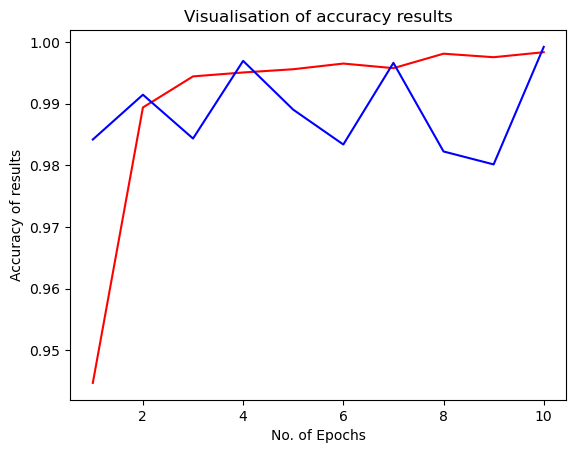

In [25]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red', label='Training accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy of results")
plt.title("Visualisation of accuracy results")
plt.show()

In [26]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

NotFoundError: Could not find directory valid

In [ ]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

In [ ]:
predicted_categories =tf.argmax(y_pred,axis=1)
y_pred,y_pred.shape

In [ ]:
predicted_categories

In [ ]:
true_categories = tf.concat([y for x,y in test_set],axis=0)

In [ ]:
true_categories

In [ ]:
Y_true = true_categories  # No need for tf.argmax()
print(Y_true)


In [ ]:
print(true_categories.shape)  # Debugging step


In [ ]:
from sklearn.metrics import classification_report , confusion_matrix

# Define class names (replace with your actual class labels)
class_name = ['healthy', 'unhealthy']  # Example: Modify based on your dataset

# Generate the classification report
print(classification_report(Y_true, predicted_categories, target_names=class_name))


In [ ]:
cm= confusion_matrix(Y_true, predicted_categories)
cm

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Example usage:
# Assuming Y_true and predicted_categories are defined
cm = confusion_matrix(Y_true, predicted_categories)

# Plot heatmap
plt.figure(figsize=(4, 4))  # Create figure first
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Save the axes to a variable

# Labels and title
ax.set_xlabel("Predicted Class")
ax.set_ylabel("Actual Class")
ax.set_title("Plant Disease Detection Confusion Matrix")

plt.show()
